# Noodles example: his noodly cosmic structure formation.

This example shows how to do simple astrophysics with Noodles. At the moment this shows how we can handle NumPy data without too much of a fuzz. This may be extended to attempt some parallelisation, optimising for data transport, and experimenting with hybrid iteration schemes.

### TODO
- include Amuse example

In [5]:
import sys
import os
sys.path = ['.'] + sys.path

In [6]:
import numpy as np
import cosmology as csf
import noodles
from noodles.run_process import process_worker
from noodles.datamodel import get_workflow
# from cosmology.loops import power_2, compose_2, scale_2

### The workflow

In [7]:
box = csf.BoxConfig(2, 256, 100.0)
force_box = csf.BoxConfig(2, 512, 100.0)
cosmos = csf.EdS

delta_wf = csf.gaussian_random_field(
    box, 
    noodles.Lambda("lambda k: 1 if k == 0 else 20000*k**(-0.75)"))
    
phi_wf = csf.compute_potential(box, delta_wf)
ics_wf = csf.zeldovich_approximation(box, phi_wf)

za = csf.drift(cosmos, ics_wf, 0.1, 0.1)
dens = csf.compute_density(force_box, za)

Running the workflow with the `process_worker` to test the saving and retrieval of NumPy data.

In [8]:
rho = noodles.Scheduler().run(process_worker(), get_workflow(dens))
rho = rho.make()

### Show the results

In [4]:
%matplotlib inline

import matplotlib
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (12.0, 9.0)
plt.rcParams['image.cmap'] = 'PaulT_plusmin'

## Register Paul Tol's colormap; see https://personal.sron.nl/~pault/
def pault_map(x):
    rcol = 0.237 - 2.13*x + 26.92*x**2 - 65.5*x**3 + 63.5*x**4 - 22.36*x**5
    gcol = ((0.572 + 1.524*x - 1.811*x**2)/(1 - 0.291*x + 0.1574*x**2))**2
    bcol = 1/(1.579 - 4.03*x + 12.92*x**2 - 31.4*x**3 + 48.6*x**4 - 23.36*x**5)
    return rcol, gcol, bcol

cols = [pault_map(x) for x in np.linspace(0, 1, 256)]
cm_plusmin = matplotlib.colors.LinearSegmentedColormap.from_list("PaulT_plusmin", cols)
plt.cm.register_cmap("PaulT_plusmin", cm_plusmin)

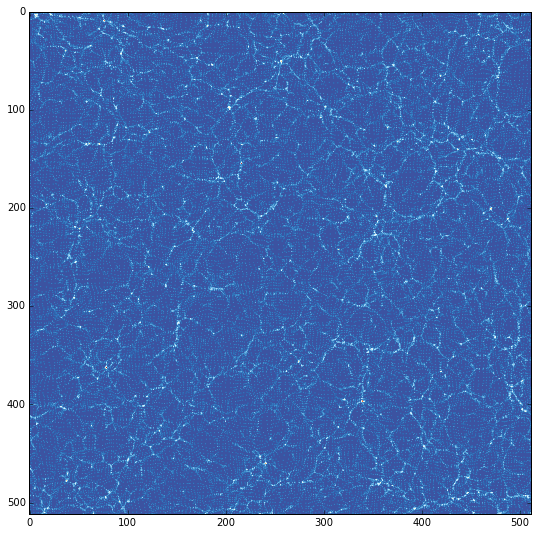

In [9]:
plt.imshow(rho.data, interpolation='nearest')